# American Sign Language Classification (ASL)

This is a  Multiclass image classification with CNN on American Sign Language Dataset. 

The dataset involves images from the American Sign Language which were seprated into 29 different folders. Each folder represented a different class. 

The classes are made up of twenty-six letters (A-Z) and three classes for 'SPACE', 'DELETE', and 'NOTHING'. In all, the training set contains 87,000 images whuch are 200x200 pixesls in width and height.


# OBJECTIVE:

The objective of this project is to train a neural network which will adequately classifiy correctly, the alphabets represented by the American Sign Language

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn  as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

import os
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
# This library will help us download the datasets
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [3]:
 #download the dataset to our current directory
url = 'https://www.kaggle.com/grassknoted/asl-alphabet/download'
od.download_kaggle_dataset(url, '.')   #this downloads the data to our current working directory


100%|██████████| 1.03G/1.03G [00:53<00:00, 20.5MB/s]


In [4]:
# check the number of datasets in class A
data_dir = './asl-alphabet'
a = os.listdir(data_dir + '/asl_alphabet_train/asl_alphabet_train/A')
print ('Number of images for A is =', len (a))

#print the first few images in A
print (a[:5])

Number of images for A is = 3000
['A933.jpg', 'A2876.jpg', 'A660.jpg', 'A1454.jpg', 'A2706.jpg']


## Loading the data

In [5]:
# convert the image folder to tensor

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
# Defined transormations to be applied before loading the dataset into ImageFolder
resize_image = torchvision.transforms.Resize((32,32)) #resize the data from 200x200 to 32x32 pixels
to_tensor = torchvision.transforms.ToTensor()       #convert to Tensor
trans_stack = torchvision.transforms.Compose([to_tensor,resize_image])  # stack the transformations

dataset = ImageFolder(data_dir+'/asl_alphabet_train/asl_alphabet_train', transform=trans_stack) #train_dataset
tst = ImageFolder (data_dir + '/asl_alphabet_test', transform=trans_stack)  # test_dataset

## Visualize the data

In [7]:
img, label = dataset[0]
print (img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.1993, 0.2459, 0.2433,  ..., 0.7585, 0.7887, 0.7942],
         [0.3111, 0.3047, 0.2838,  ..., 0.7401, 0.7574, 0.8009],
         [0.4419, 0.3862, 0.3770,  ..., 0.6206, 0.6203, 0.6225],
         ...,
         [0.5225, 0.5422, 0.5594,  ..., 0.6039, 0.5887, 0.6056],
         [0.5319, 0.5465, 0.5431,  ..., 0.5917, 0.5922, 0.5904],
         [0.5275, 0.5482, 0.5635,  ..., 0.6148, 0.5922, 0.6017]],

        [[0.1784, 0.1758, 0.1966,  ..., 0.6791, 0.7096, 0.7162],
         [0.2459, 0.2340, 0.2275,  ..., 0.6686, 0.6941, 0.7303],
         [0.3817, 0.3592, 0.3100,  ..., 0.4820, 0.4855, 0.4737],
         ...,
         [0.5387, 0.5417, 0.5624,  ..., 0.5608, 0.5455, 0.5482],
         [0.5402, 0.5460, 0.5500,  ..., 0.5603, 0.5491, 0.5330],
         [0.5540, 0.5447, 0.5620,  ..., 0.5456, 0.5387, 0.5393]],

        [[0.2229, 0.1761, 0.1994,  ..., 0.6742, 0.7096, 0.6348],
         [0.2335, 0.1629, 0.1250,  ..., 0.5881, 0.6298, 0.5749],
         [0.3769, 0.2292, 0.2453,  ..., 0.3341, 0.3388, 0.

In [8]:
# Define a custom function to plot the images

def image_plot (image, label):
  """This function takes in two arguments (and image with label) and 
  plots the image as a photo instead of returning tensor values"""
  print ('Label (textual):', dataset.classes[label],'\n Label (numerical) =', label )
  plt.imshow(image.permute(1,2,0))

Label (textual): A 
 Label (numerical) = 0


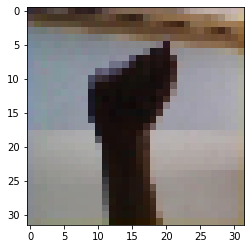

In [9]:
image_plot(*dataset[0])

In [10]:
classes = os.listdir(data_dir + '/asl_alphabet_train/asl_alphabet_train')

for clas in range (len(classes)):
  num = 0
  for _, lab in dataset:
    if lab==clas:
      num += 1
    
  print (f'{clas+1}. Images belonging to {classes[clas]} is = {num}') 

1. Images belonging to Y is = 3000
2. Images belonging to D is = 3000
3. Images belonging to R is = 3000
4. Images belonging to P is = 3000
5. Images belonging to K is = 3000
6. Images belonging to E is = 3000
7. Images belonging to Q is = 3000
8. Images belonging to H is = 3000
9. Images belonging to space is = 3000
10. Images belonging to del is = 3000
11. Images belonging to X is = 3000
12. Images belonging to J is = 3000
13. Images belonging to F is = 3000
14. Images belonging to I is = 3000
15. Images belonging to S is = 3000
16. Images belonging to V is = 3000
17. Images belonging to Z is = 3000
18. Images belonging to O is = 3000
19. Images belonging to T is = 3000
20. Images belonging to N is = 3000
21. Images belonging to M is = 3000
22. Images belonging to W is = 3000
23. Images belonging to G is = 3000
24. Images belonging to A is = 3000
25. Images belonging to nothing is = 3000
26. Images belonging to B is = 3000
27. Images belonging to L is = 3000
28. Images belonging to U

# Data Preprocessing for training

In [16]:
#Remove a portion from the train_dataset and use as validation. This will be used to validate our model while training

torch.manual_seed(42)  #this line enables we always get the same sequence of random_split to ensure reproducibility
val_size = 5000        # data size to be used for validation
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(82000, 5000)

In [17]:
#This has to be tweaked to find the optimum taining batch_size
batch_size = 64

In [18]:
# Putting the data into dataloader so we can handle properly

train_loader = DataLoader(train_ds, batch_size, shuffle=True, 
                          num_workers=4, pin_memory=True)

val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

test_loader = DataLoader(tst, batch_size*2, num_workers=4, pin_memory=True)

image.shape: torch.Size([64, 3, 32, 32])


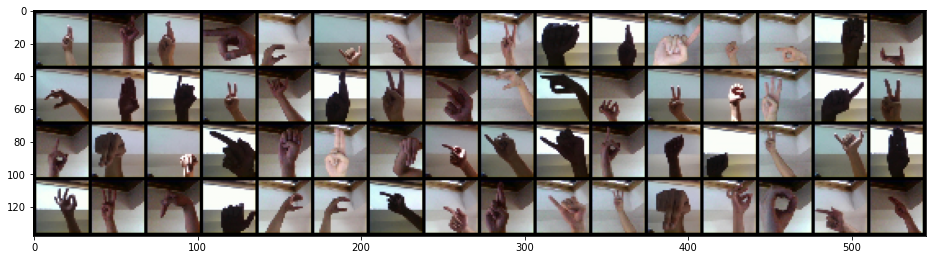

In [19]:
for img, _ in train_loader:
  print('image.shape:', img.shape)
  plt.figure(figsize=(16,8))
  #plt.axis('off')
  plt.imshow((make_grid(img, nrow=16).permute(1,2,0)))
  break

In [ ]:
jovian.commit(project=project_name)

## Training our model

## Extend the nn.Module class

In [20]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generates predictions
        loss = F.cross_entropy(out, labels) # Calculates loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generates predictions
        loss = F.cross_entropy(out, labels)   # Calculates loss
        acc = accuracy(out, labels)           # Calculates accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combines losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combines accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

## Design the Model Architechture

In [21]:
class SignConvModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        # input: 3 x 32 x 32
        nn.Conv2d(3,32,kernel_size=3, padding=1),
       # output: 32 x 32 x 32
        nn.ReLU(),
        #output:  32 x 32x 32
        nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
        #output: 64 x 32 x 32
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output: 16

        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),  #output: 8

        nn.Conv2d(128,256,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # output: 4


        nn.Flatten(),
        nn.Linear(32*32*4, 64),  #Tip:multiply the horizontal and vertical heights of your pixels to get the output ofthe first layer.from there, you can begin to divide by 2.
        nn.ReLU(),
        nn.Linear(64 ,128),
        nn.ReLU(),
        nn.Linear(128, 29)
    )
    
  def forward(self, xb):
    return self.network(xb)

In [22]:
# Checking the model architecture
model_conv = SignConvModel()
model_conv

SignConvModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features

In [23]:
#view what happens as image passes through the model
for img,_ in train_loader:
  print ('images.shape:', img.shape)
  out = model_conv(img)
  print ('out.shape:', out.shape)
  print ('out[0]:', out[0])
  break

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 29])
out[0]: tensor([-0.0700, -0.0741,  0.0589,  0.0175, -0.0569,  0.0523, -0.0328,  0.1042,
        -0.0188, -0.0170, -0.1090, -0.0288, -0.0022, -0.0124,  0.0510, -0.0431,
        -0.0479,  0.0876, -0.1210,  0.1272, -0.0240, -0.0266, -0.0624, -0.0502,
        -0.0271, -0.0879,  0.0503,  0.0721, -0.0212],
       grad_fn=<SelectBackward0>)


# GPU
## This section checks if there is a GPU available and defines a function to move the model and datasets into the GPU memory

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
device = get_default_device()
device

device(type='cuda')

In [26]:
train_dl = DeviceDataLoader(train_loader , device)
val_dl = DeviceDataLoader(val_loader, device)
model_conv = to_device(model_conv, device);

In [27]:
test_dl = DeviceDataLoader(test_loader, device)

In [28]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [29]:
evaluate(model_conv, val_dl)

{'val_loss': 3.3687942028045654, 'val_acc': 0.03164062649011612}

In [30]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001
model = model_conv

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
API KEY: ··········
[jovian] Hyperparams logged.


In [31]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.9724, val_loss: 0.1321, val_acc: 0.9602
Epoch [1], train_loss: 0.0898, val_loss: 0.0410, val_acc: 0.9871
Epoch [2], train_loss: 0.0542, val_loss: 0.0396, val_acc: 0.9871
Epoch [3], train_loss: 0.0381, val_loss: 0.0248, val_acc: 0.9910
Epoch [4], train_loss: 0.0345, val_loss: 0.0376, val_acc: 0.9877
Epoch [5], train_loss: 0.0274, val_loss: 0.0297, val_acc: 0.9900
Epoch [6], train_loss: 0.0239, val_loss: 0.0172, val_acc: 0.9947
Epoch [7], train_loss: 0.0212, val_loss: 0.0083, val_acc: 0.9971
Epoch [8], train_loss: 0.0197, val_loss: 0.0104, val_acc: 0.9959
Epoch [9], train_loss: 0.0187, val_loss: 0.0162, val_acc: 0.9941


In [32]:
num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.0003

In [33]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.0029, val_loss: 0.0010, val_acc: 0.9998
Epoch [1], train_loss: 0.0002, val_loss: 0.0001, val_acc: 1.0000
Epoch [2], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [3], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [4], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000


In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


Saving the model

In [ ]:
torch.save(model.state_dict(), 'sign_model.pth')

In [ ]:
model.state_dict()

OrderedDict([('network.0.weight',
              tensor([[[[ 8.0914e-02, -1.8267e-02,  2.1986e-01],
                        [ 1.0136e-01,  1.1700e-01,  1.3521e-02],
                        [-4.5511e-03,  2.8555e-02,  1.2629e-01]],
              
                       [[-3.0055e-01,  6.8645e-02,  8.8503e-02],
                        [-1.3767e-01, -1.0494e-01, -1.6979e-01],
                        [-3.2674e-02, -3.1784e-01, -2.5752e-01]],
              
                       [[ 1.3406e-01,  9.8201e-02,  5.5254e-02],
                        [ 2.0732e-01,  8.4599e-02, -1.5516e-01],
                        [ 1.6060e-01, -9.3313e-02, -1.2234e-01]]],
              
              
                      [[[-1.1714e-01,  2.0582e-01,  1.8346e-01],
                        [-4.6520e-02,  1.1771e-01, -4.5932e-02],
                        [ 1.1154e-01, -5.2771e-02,  7.2036e-02]],
              
                       [[-1.2508e-02,  5.5881e-02, -5.2158e-02],
                        [-1.5088e-01, -1.

In [1]:
# Just in case we need to load the model later on 


#model2 = SignConvModel()
#model2.load_state_dict(torch.load('sign_model.pth'))
#model2.state_dict()

In [34]:
evaluate(model,val_dl )

{'val_loss': 2.3604827219969593e-05, 'val_acc': 1.0}

Ploting validation accuracy to study how the model improved over time

In [35]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

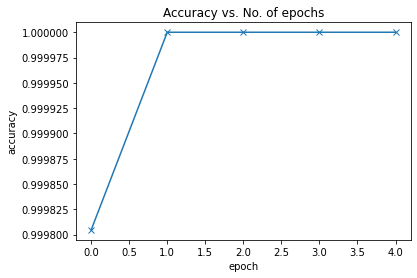

In [36]:
plot_accuracies(history)

Plot training and validation losses

In [37]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

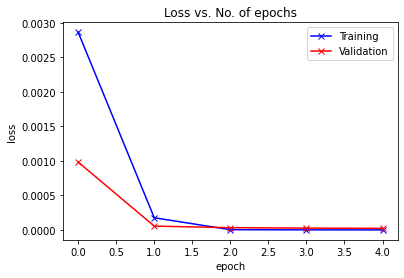

In [38]:
plot_losses(history)

# Summary:

The model gave an accuracy of 99.98%, the training and validation loss showed that the model was not overfitting (i.e. it was actually learning and not memorizing the training dataset).

This notebook contains the final model architecture obtained after several trails and errors.



# Conclusion:

During the period of this course, deeplearning has truly been dimystified from Zero to GANs using pytorch. Before now, I had tried learning pytorch through several platforms but non gives an ideal learning experience compared to this. 

Asides pytorch, it has also strengthened my knowledge in some basic concepts of python like 'object oriented programming'. I also got a good grasp (from the first assignment) on how to properly read and understand various documentations.


# Opportunities for Future Work:

After this, I hope to get more hands on experience with Natural Language Processing using PyTorch. From there, I can further work on various 'image captioning' projects.

Thank you Jovian!